Voting Regressor Ensemble (Kristin)
1.  Model #1: use Linear Regression, KNN Regression , Random Forest - soft voting (on with voting regressor, only soft voting available)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



vgsales = pd.read_excel('vgsales_v5.xlsx')

vgsales.head()

# Create dummy variables for | Genre | First_Party | Platform_Type

#dummy variables for Genre
dummy_genre = pd.get_dummies(vgsales.Genre)
dummy_genre

#dummy variables for First Party
dummy_first_party = pd.get_dummies(vgsales.First_Party)
dummy_first_party

#dummy variables for Platform Type
dummy_platform_type = pd.get_dummies(vgsales.Platform_Type)
dummy_platform_type

#Merge dummy frames into one dataset with original vgsales datframe
merged_vgsales = pd.concat([vgsales, dummy_genre, dummy_first_party, dummy_platform_type], axis='columns')






In [2]:
vgsales_df = pd.DataFrame(merged_vgsales)



In [3]:
#drop Rank (it is perfectly correlated with sales because it is based on global sales & is a result of sales
# drop Name (a significant number of dummy variables would have to be created and we are not analyzing the impact of name, but trying to understand impact of genre, platform and region on sales)
#drop Platform (we have created Platform Type and First Parties categories that are more meaningful than Platform)
#drop Publisher (similar reason as Name)


vgsales_df2 = vgsales_df.drop(columns = ["Rank","Name", "Platform", "Publisher","Genre", "First_Party", "Platform_Type","Year_1_Sales", "Year", "Atari","SEGA", "Other"])

In [4]:
#Create X, y

X = vgsales_df2.drop(columns = "Global_Sales")
y = vgsales_df2.Global_Sales

In [5]:
#create test/train/validation sets, 80% = train, 10% = test, 10% = validation
#check shape to ensure similar sizes 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(12783, 24)
(12783,)
(1598, 24)
(1598,)
(1598, 24)
(1598,)


Random Forest

In [6]:
#import libraries for random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
import timeit
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std


In [7]:
#Create voting regressor with default parameters and default paremeters of each model (soft voting)

lin_reg1 = LinearRegression()
rnd_reg1 = RandomForestRegressor(n_estimators = 100)
knn_reg1 = KNeighborsRegressor()

soft_voting_reg=  VotingRegressor(estimators = [("lr", lin_reg1),("rf", rnd_reg1),("knn", knn_reg1)])
  
soft_voting_reg.fit(X_train, y_train)

for reg in (lin_reg1, rnd_reg1, knn_reg1, soft_voting_reg):
    reg.fit(X_train, y_train)
    y_pred1 = reg.predict(X_val)
    print("MSE:", reg.__class__.__name__, mean_squared_error(y_val, y_pred1))
    print("RMSE:", reg.__class__.__name__, sqrt(mean_squared_error(y_val, y_pred1)))
    print("R-squared:", reg.__class__.__name__, r2_score(y_val, y_pred1))

    print("training time:", timeit.timeit())


#linear regression and random forest regressor better than voting classifier

MSE: LinearRegression 2.7220071646076635e-05
RMSE: LinearRegression 0.005217285850523875
R-squared: LinearRegression 0.9999867893979695
training time: 0.009127800000001685
MSE: RandomForestRegressor 0.07835806136420531
RMSE: RandomForestRegressor 0.27992509956094563
R-squared: RandomForestRegressor 0.9619708141100558
training time: 0.015005500000000893
MSE: KNeighborsRegressor 0.11521303629536922
RMSE: KNeighborsRegressor 0.33943045870305927
R-squared: KNeighborsRegressor 0.9440841452948071
training time: 0.008170399999999134
MSE: VotingRegressor 0.018204746549292907
RMSE: VotingRegressor 0.13492496636758117
R-squared: VotingRegressor 0.991164767497443
training time: 0.01204869999999758


>LinearRegression 0.005 (0.000)
>RandomForestRegressor 0.274 (0.000)
>KNeighborsRegressor 0.339 (0.000)
>VotingRegressor 0.132 (0.000)


ValueError: Dimensions of labels and X must be compatible

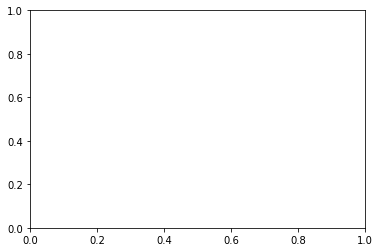

In [9]:
# tried creating box plot, but it did not work, the results for the models are different below from above????

results, names = [],list()

for reg in (lin_reg1, rnd_reg1, knn_reg1, soft_voting_reg):
    reg.fit(X_train, y_train)
    y_pred1 = reg.predict(X_val)
    scores = sqrt(mean_squared_error(y_val, y_pred1))
    name = reg.__class__.__name__
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()